# M7-L1 Problem 2

In this problem, you will explore what happens when you change the weights/biases of a neural network.

Neural networks act as functions that attempt to map from input data to output data. In training a neural network, the goal is to find the values of weights and biases that minimize the loss between their output and the desired output. This is typically done with a technique called backpropagation; however, here you will simply note the effect of changing specific weights in the network which has been pre-trained.

First, load the data and initial weights/biases below:

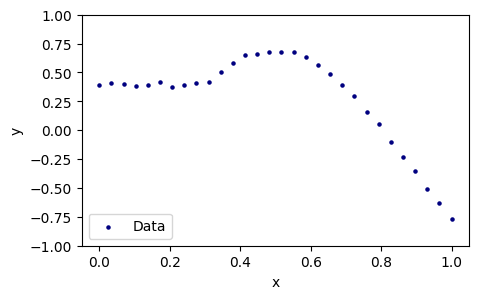

In [5]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([0.        , 0.03448276, 0.06896552, 0.10344828, 0.13793103,0.17241379, 0.20689655, 0.24137931, 0.27586207, 0.31034483,0.34482759, 0.37931034, 0.4137931 , 0.44827586, 0.48275862,0.51724138, 0.55172414, 0.5862069 , 0.62068966, 0.65517241,0.68965517, 0.72413793, 0.75862069, 0.79310345, 0.82758621,0.86206897, 0.89655172, 0.93103448, 0.96551724, 1.        ]).reshape(-1,1)
y = np.array([ 0.38914369,  0.40997345,  0.40282978,  0.38493705,  0.394214  ,0.41651437,  0.37573321,  0.39571087,  0.41265936,  0.41953955,0.50596807,  0.58059196,  0.6481607 ,  0.66050901,  0.67741369,0.67348567,  0.67696078,  0.63537378,  0.56446933,  0.48265412,0.39540671,  0.29878237,  0.15893846,  0.05525194, -0.10070259,-0.23055219, -0.35288448, -0.51317604, -0.63377544, -0.76849408]).reshape(-1,1)

weights = [np.array([[-5.90378086,  0,  0 ]]).T,
           np.array([[ 0.8996511 ,  4.75805319, -0.95266992],[-0.99667812, -0.89303165,  3.19020423],[-1.65213421, -2.93268438,  2.61332701]]).T,
           np.array([[ 1.71988943, -1.56198034, -3.31173131]])]

biases = [np.array([ 2.02112296, -3.47589349, -1.11586831]), np.array([ 1.35350721, -0.11181542, -4.0283719 ]), np.array([0.51626399])]

plt.figure(figsize=(5,3))
plt.scatter(x,y,s=5,c="navy",label="Data")
plt.legend(loc="lower left")
plt.ylim(-1,1)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

## MLP Function
Copy in your MLP function (and all necessary helper functions) below. Make sure it is called `MLP()`. In this case, you can plug in `x`, `weights`, and `biases` to try and predict `y`. Make sure you use the sigmoid activation function after each layer (except the final layer).

In [6]:
def perceptron_layer(x, weight, bias):
    return x@weight.T + bias

def sigmoid(x):
    return 1./(1.+np.exp(-x))

def MLP(x, weights, biases):
    a = x
    for i,weight in enumerate(weights[:-1]):
        a = sigmoid(perceptron_layer(a, weight, biases[i]))

    return perceptron_layer(a, weights[-1], biases[-1])

## Varying weights


The provided network has 2 hidden layers, each with 3 neurons. The weights and biases are shown below.
Note the weights $w_a$ and $w_b$ -- these are left for you to investigate:

$$
\underline{x\; (N\times 1)} \rightarrow
\sigma\left(w = 
\begin{bmatrix}
  -5.9\\
  \boldsymbol{w_a}\\
  \boldsymbol{w_b}\\
\end{bmatrix}

;b = 
\begin{bmatrix}
  2.02\\
  -3.48\\
  -1.12\\
\end{bmatrix}'

\right)\rightarrow


\underline{(N\times 3)} \rightarrow
\sigma\left(w = 
\begin{bmatrix}
  0.9 & -1. & -1.65\\
  4.76 & -0.89 & -2.93\\
  -0.95 & 3.19 & 2.61\\
\end{bmatrix}

;b = 
\begin{bmatrix}
  1.35\\
  -0.11\\
  -4.03\\
\end{bmatrix}'



\right)\rightarrow

\underline{(N\times 3)} \rightarrow
\sigma\left(w = 
\begin{bmatrix}
  1.72\\ -1.56\\ -3.31\\
\end{bmatrix}'

;b = 
\begin{bmatrix}
  0.52\\
\end{bmatrix}'

\right)\rightarrow
\underline{\hat{y}\; (N\times 1)}
$$



We can compute the MSE for each combination of $(w_a, w_b)$ to see where MSE is minimized.

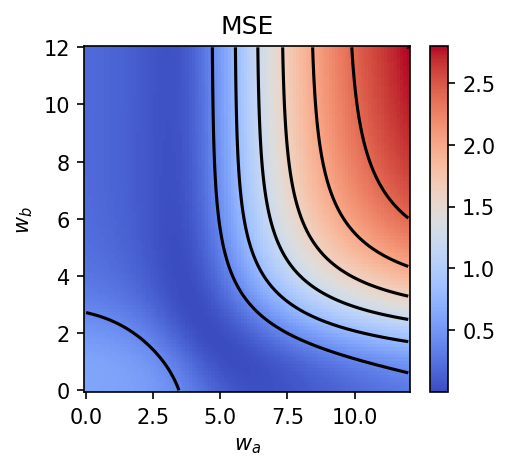

In [7]:
def MSE(y, pred):
    return np.mean((y.flatten()-pred.flatten())**2)

vals = np.linspace(0,12,100)
was, wbs = np.meshgrid(vals,vals)
mses = np.zeros_like(was.flatten())

for i in range(len(was.flatten())):
    ws, bs = weights.copy(), biases.copy()
    ws[0][1,0] = was.flatten()[i]
    ws[0][2,0] = wbs.flatten()[i]
    mses[i] = MSE(y, MLP(x, ws, bs))
mses = mses.reshape(was.shape)

plt.figure(figsize = (3.5,3),dpi=150)
plt.title("MSE")
plt.contour(was,wbs,mses,colors="black")
plt.pcolormesh(was,wbs,mses,shading="nearest",cmap="coolwarm")
plt.xlabel("$w_a$")
plt.ylabel("$w_b$")
plt.colorbar()
plt.show()


In [8]:
# %matplotlib inline
from ipywidgets import interact, interactive, fixed, interact_manual, Layout, FloatSlider, Dropdown


def plot(wa, wb):
    ws, bs = weights.copy(), biases.copy()
    ws[0][1,0] = wa
    ws[0][2,0] = wb

    xs = np.linspace(0,1)
    ys = MLP(xs.reshape(-1,1), ws, bs)


    plt.figure(figsize=(10,4),dpi=120)

    plt.subplot(1,2,1)
    plt.contour(was,wbs,mses,colors="black")
    plt.pcolormesh(was,wbs,mses,shading="nearest",cmap="coolwarm")
    plt.title(f"$w_a = {wa:.1f}$;  $w_b = {wb:.1f}$")
    plt.xlabel("$w_a$")
    plt.ylabel("$w_b$")
    plt.scatter(wa,wb,marker="*",color="black")
    plt.colorbar()

    plt.subplot(1,2,2)
    plt.scatter(x,y,s=5,c="navy",label="Data")
    plt.plot(xs,ys,"r-",linewidth=1,label="MLP")
    plt.title(f"MSE = {MSE(y, MLP(x, ws, bs)):.3f}")
    plt.legend(loc="lower left")
    plt.ylim(-1,1)
    plt.xlabel("x")
    plt.ylabel("y")

    plt.show()


slider1 = FloatSlider(
    value=0,
    min=0,
    max=12,
    step=.5,
    description='wa',
    disabled=False,
    continuous_update=True,
    orientation='horizontal',
    readout=False,
    layout = Layout(width='550px')
)

slider2 = FloatSlider(
    value=0,
    min=0,
    max=12,
    step=.5,
    description='wb',
    disabled=False,
    continuous_update=True,
    orientation='horizontal',
    readout=False,
    layout = Layout(width='550px')
)



interactive_plot = interactive(
    plot,
    wa = slider1,
    wb = slider2
    )
output = interactive_plot.children[-1]
output.layout.height = '500px'

interactive_plot

interactive(children=(FloatSlider(value=0.0, description='wa', layout=Layout(width='550px'), max=12.0, readout…

## Questions

1. For $w_a = 4.0$, what walue of $w_b$ gives the lowest MSE (to the nearest 0.5)?
- 3.0

2. For the large values of $w_a$ and $w_b$, describe the MLP's predictions.
- For large values of $w_a$ and $w_b$, the MLP's prediction gets much worse. It starts to not fit the end points very well.